# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Uploading the dataset

In [2]:
path = "car_purchasing.csv"

In [3]:
dataset = pd.read_csv(path, encoding='latin-1')

# Preliminary analysis of the data

### Basic Overview 

In [4]:
dataset.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [5]:
dataset.shape

(500, 9)

In [6]:
dataset.ndim

2

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [8]:
dataset.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


# Data Cleaning and transformation

### Removing redundant columns

In [9]:
df1 = dataset.drop("customer name", axis = 1)

In [10]:
df2 = df1.drop("customer e-mail", axis = 1)

### Replacing 0 values and empty strings with null values

##### For numeric values

In [11]:
num_col_df  = df2.loc[:, ["age", "annual Salary", "credit card debt", "net worth", "car purchase amount"]]

In [12]:
for col in list(num_col_df):
        num_col_df.loc[num_col_df[col] == 0, col] = np.nan
        df2[col] = num_col_df[col]

##### For categorical values

In [13]:
cat_col_df = df2.loc[:, ["country"]]

In [14]:
for col in list(cat_col_df):
    c = 0
    for i in cat_col_df[col]:
        if (i.isspace()==True):
            cat_col_df.loc[c, col] = np.nan
        c = c+1
    df2[col] = cat_col_df[col]

### Checking and removing null values

In [15]:
df2.isnull().sum()

country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

### Checking for outliers

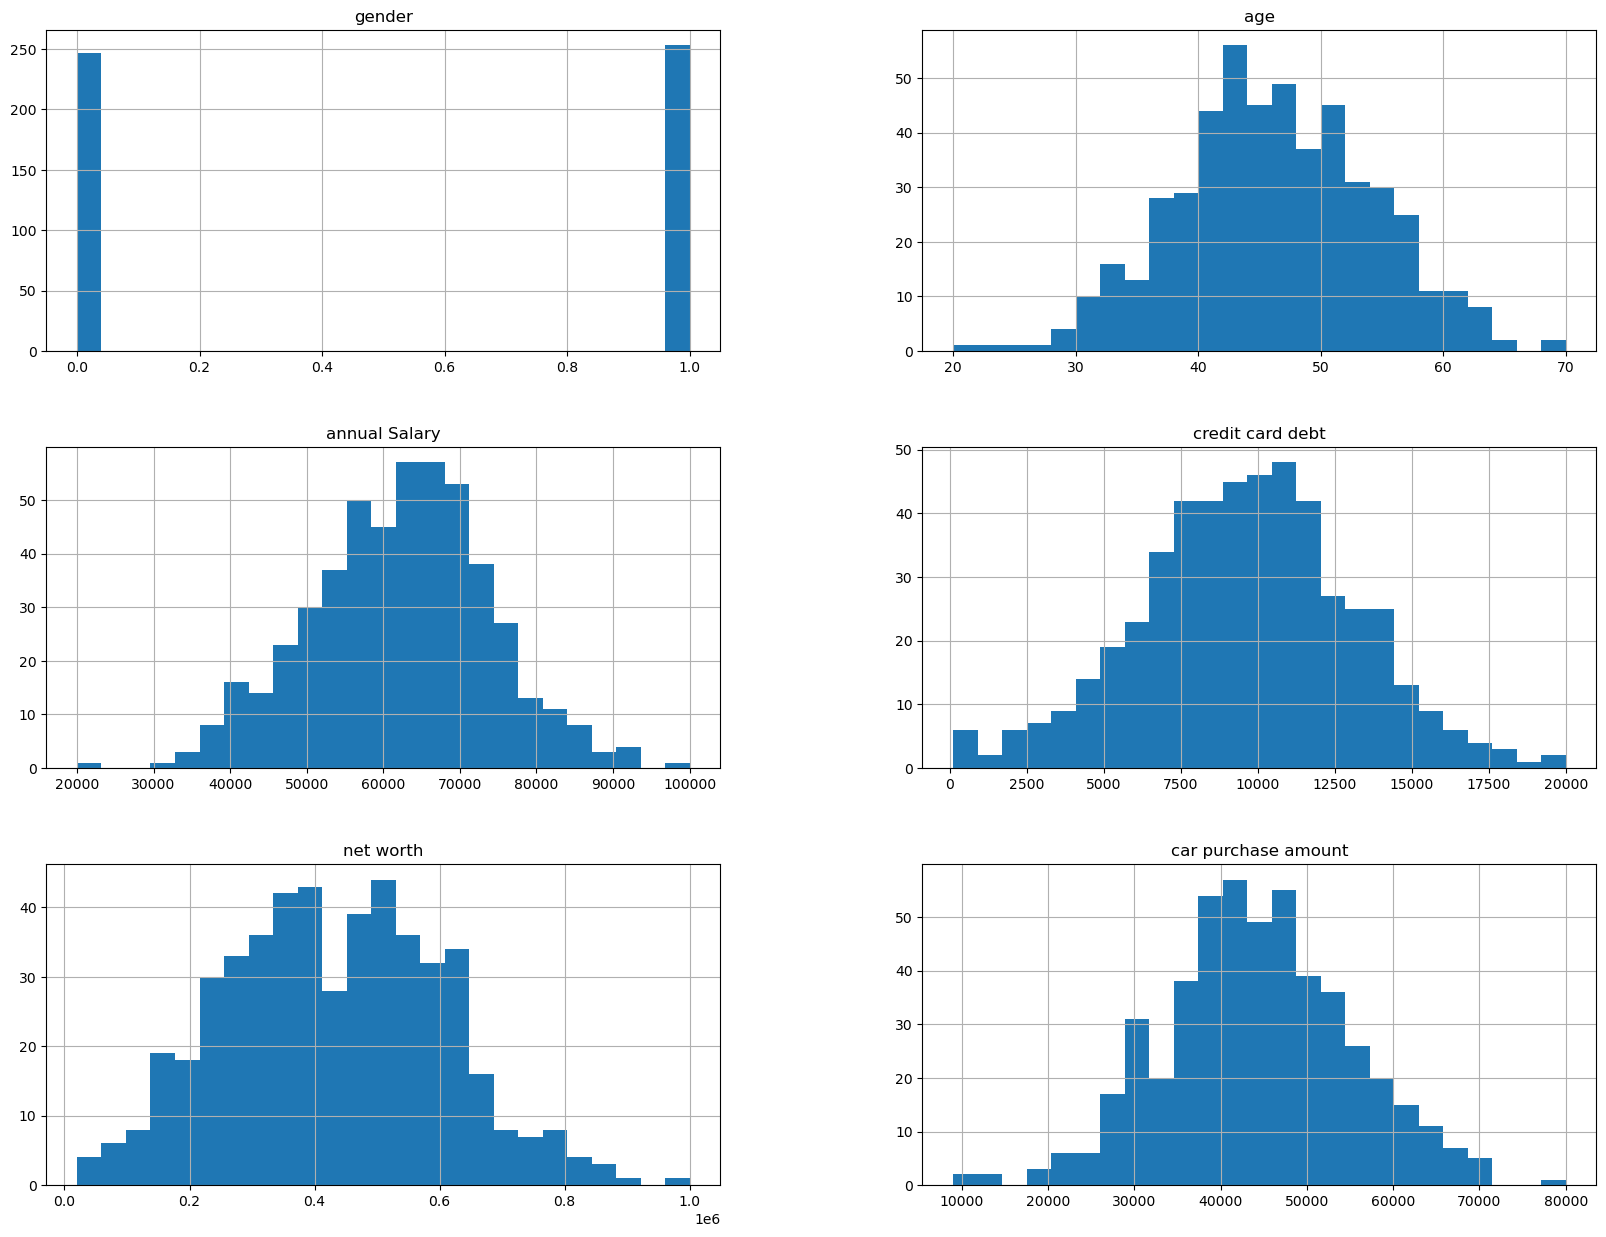

In [16]:
df2.hist(bins=25, figsize=(20,15))
plt.show()

# Data exploration and visualization

### Checking the categorical values

In [17]:
df2["country"].value_counts()

Israel                 6
Mauritania             6
Bolivia                6
Greenland              5
Saint Barthélemy       5
                      ..
El Salvador            1
Denmark                1
Oman                   1
Trinidad and Tobago    1
marlal                 1
Name: country, Length: 211, dtype: int64

In [18]:
df2["gender"].value_counts()

1    253
0    247
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender distribution in buying of cars')

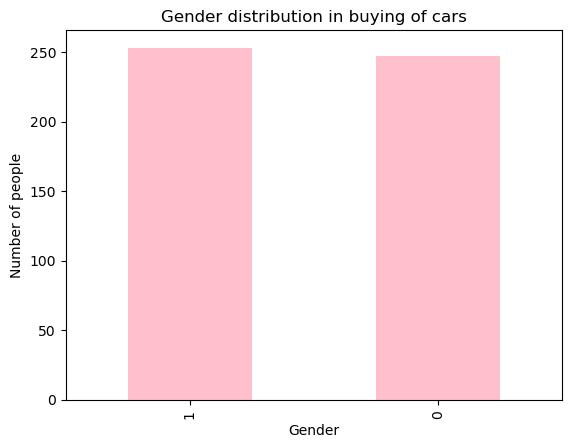

In [19]:
gender = df2["gender"].value_counts()
gender.plot(kind = 'bar', color = 'pink')
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.title("Gender distribution in buying of cars")

### Checking the correlations

In [20]:
correlation = df2.corr()
correlation["car purchase amount"].sort_values(ascending = False)

car purchase amount    1.000000
age                    0.632865
annual Salary          0.617862
net worth              0.488580
credit card debt       0.028882
gender                -0.066408
Name: car purchase amount, dtype: float64

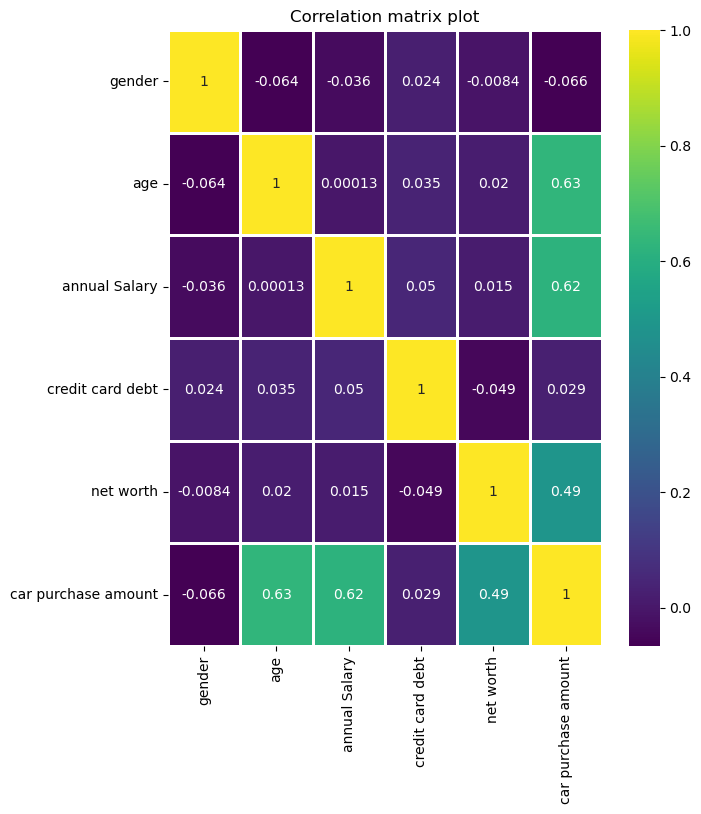

In [21]:
plt.figure(figsize = (7, 8))
sns.heatmap(correlation, annot=True, cmap='viridis', linewidths = 1)

plt.title("Correlation matrix plot")
plt.show()

### Checking the scatter matrix plot

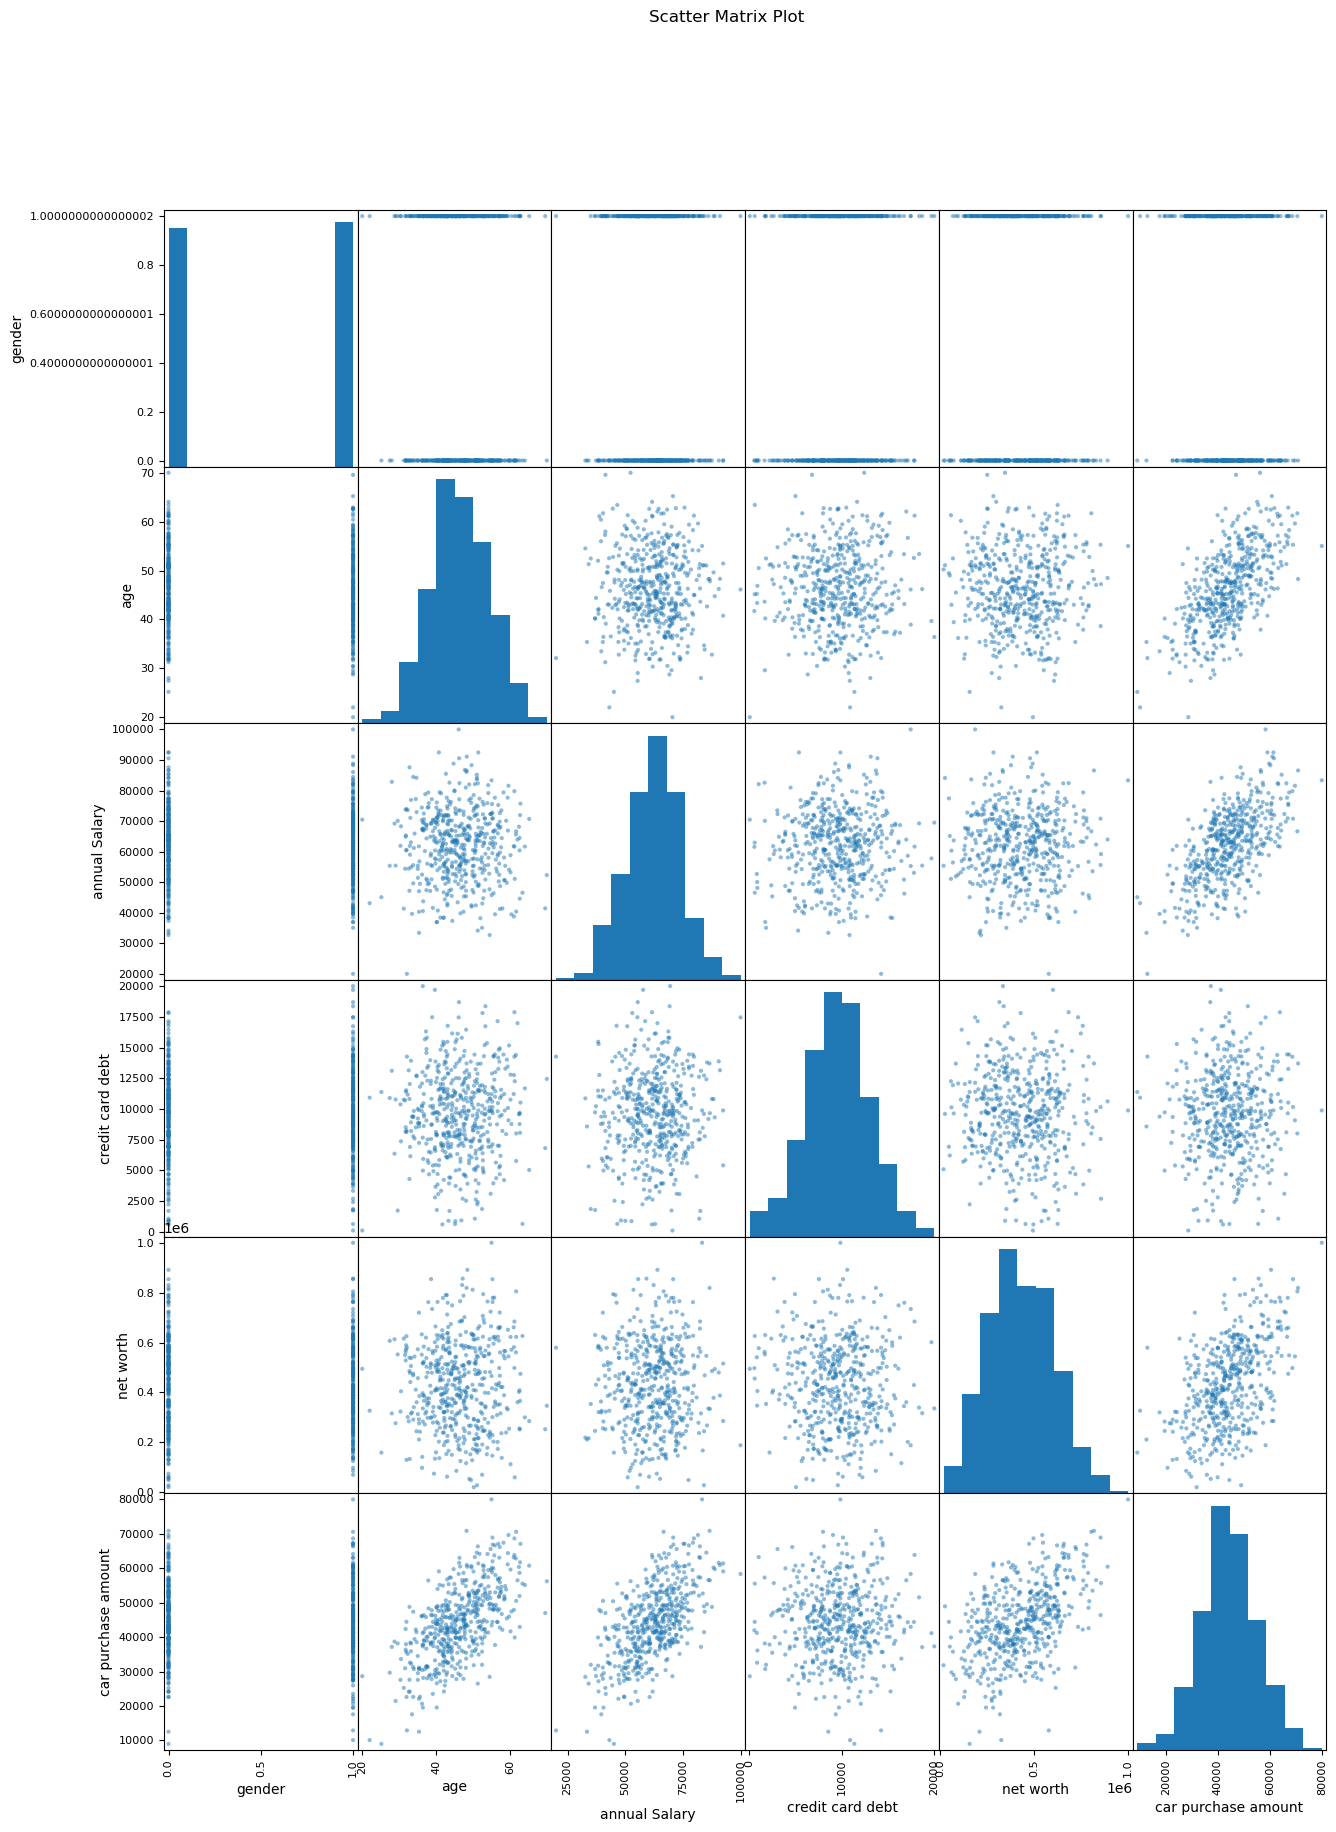

In [22]:
from pandas.plotting import scatter_matrix

scatter_matrix(df2, alpha=0.5, figsize = (15, 20))

plt.suptitle('Scatter Matrix Plot')
plt.show()

# Feature engineering to remove unnecesary features

In [23]:
df3 = df2.drop("country", axis = 1) #Too many categories

In [24]:
df4 = df3.drop("gender", axis = 1)

In [25]:
df5 = df4.drop("credit card debt", axis = 1)

# Splitting the dataset

### Splitting into target variable and matrix of features

In [26]:
x = df5.iloc[:, :-1]
y = df5.iloc[:, -1]

### Splitting into training and testing set

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Applying transformations

###  For numeric values

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

# Applying transformations to the test dataset

In [29]:
x_test = scaler.transform(x_test)

# Performing Cross Validation to check over/under fitting

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

regressor1 = DecisionTreeRegressor()
regressor2 = DecisionTreeRegressor()
scores = cross_val_score(regressor1, x_train, y_train, scoring="neg_mean_squared_error", cv=5)
rmse = np.sqrt(-scores)
print("Scores of validation models: ")
print(np.round(rmse, 3))

regressor2.fit(x_train, y_train)
y_pred = regressor2.predict(x_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
print("Scores on training model: ")
print(np.round(rmse, 3))

#Since the mean squared scores for validation are larger, the model is over-fitting

Scores of validation models: 
[4235.469 3973.484 4473.946 3327.245 3645.885]
Scores on training model: 
0.0


# Training the various regression models

In [31]:
from sklearn.metrics import r2_score

### Multiple Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

regressor1 = LinearRegression()
regressor1.fit(x_train, y_train)
y_pred = regressor1.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("The root mean squared error = ", np.round(rmse, 3))
print("The R2 score = ", r2_score(y_test, y_pred))

The root mean squared error =  1.431
The R2 score =  0.9999999810273109


### Polynomial Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=3)
regressor2 = LinearRegression()
x_train_poly = poly_reg.fit_transform(x_train)
regressor2.fit(x_train_poly, y_train)
x_test_poly = poly_reg.transform(x_test)
y_pred = regressor2.predict(x_test_poly)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("The root mean squared error = ", np.round(rmse, 3))
print("The R2 score = ", r2_score(y_test, y_pred))

The root mean squared error =  1.449
The R2 score =  0.9999999805455587


### Stochastic Gradient Descent

In [34]:
from sklearn.linear_model import SGDRegressor

regressor3 = SGDRegressor(max_iter = 500, tol = 1e-3, penalty = None, eta0 = 0.01)
regressor3.fit(x_train, y_train)
y_pred = regressor3.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("The root mean squared error = ", np.round(rmse, 3))
print("The R2 score = ", r2_score(y_test, y_pred))

The root mean squared error =  1.43
The R2 score =  0.9999999810564101


### Regularized Regression

##### Ridge Regression

In [35]:
from sklearn.linear_model import SGDRegressor

regressor4 = SGDRegressor(max_iter = 500, tol = 1e-3, penalty = "l2", eta0 = 0.01)
regressor4.fit(x_train, y_train)
y_pred = regressor4.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("The root mean squared error = ", np.round(rmse, 3))
print("The R2 score = ", r2_score(y_test, y_pred))

The root mean squared error =  1.74
The R2 score =  0.9999999719725997


In [36]:
from sklearn.linear_model import Ridge

regressor5 = Ridge(alpha = 0.1, solver = "cholesky")
regressor5.fit(x_train, y_train)
y_pred = regressor5.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("The root mean squared error = ", np.round(rmse, 3))
print("The R2 score = ", r2_score(y_test, y_pred))

The root mean squared error =  2.92
The R2 score =  0.9999999210421652


##### Lasso Regression

In [37]:
from sklearn.linear_model import SGDRegressor

regressor6 = SGDRegressor(max_iter = 500, tol = 1e-3, penalty = "l1", eta0 = 0.01)
regressor6.fit(x_train, y_train)
y_pred = regressor6.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("The root mean squared error = ", np.round(rmse, 3))
print("The R2 score = ", r2_score(y_test, y_pred))

The root mean squared error =  1.431
The R2 score =  0.9999999810228549


In [38]:
from sklearn.linear_model import Lasso

regressor7 = Lasso(alpha = 0.1)
regressor7.fit(x_train, y_train)
y_pred = regressor7.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("The root mean squared error = ", np.round(rmse, 3))
print("The R2 score = ", r2_score(y_test, y_pred))

The root mean squared error =  1.435
The R2 score =  0.9999999809334973


##### Elastic Regression

In [39]:
from sklearn.linear_model import ElasticNet

regressor8 = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
regressor8.fit(x_train, y_train)
y_pred = regressor8.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("The root mean squared error = ", np.round(rmse, 3))
print("The R2 score = ", r2_score(y_test, y_pred))

The root mean squared error =  494.108
The R2 score =  0.9977388544414953


### SVR

##### Linear SVR

In [40]:
from sklearn.svm import LinearSVR

regressor9= LinearSVR()
regressor9.fit(x_train, y_train)
y_pred = regressor9.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("The root mean squared error = ", np.round(rmse, 3))
print("The R2 score = ", r2_score(y_test, y_pred))

The root mean squared error =  46052.314
The R2 score =  -18.64206338073295


##### SVR with sigmoid kernel

In [41]:
from sklearn.svm import SVR

regressor10 = SVR(kernel = 'sigmoid')
regressor10.fit(x_train, y_train)
y_pred = regressor10.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("The root mean squared error = ", np.round(rmse, 3))
print("The R2 score = ", r2_score(y_test, y_pred))

The root mean squared error =  10402.559
The R2 score =  -0.0022234434410228765


##### SVR with rbf kernel

In [42]:
from sklearn.svm import SVR

regressor11 = SVR(kernel = 'rbf')
regressor11.fit(x_train, y_train)
y_pred = regressor11.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("The root mean squared error = ", np.round(rmse, 3))
print("The R2 score = ", r2_score(y_test, y_pred))

The root mean squared error =  10450.699
The R2 score =  -0.011520907629593902


### Artifcial Neural Networks

In [43]:
from tensorflow import keras
from keras.layers import Dense, Input
from keras.models import Sequential

##### Without scaling target

In [44]:
model2 = Sequential()
model2.add(Input(shape = (x_train.shape[1:])))
model2.add(Dense(800, kernel_initializer='normal', activation = 'relu'))
model2.add(Dense(500, kernel_initializer='normal', activation = 'relu'))
model2.add(Dense(300, kernel_initializer='normal', activation = 'relu'))
model2.add(Dense(100, kernel_initializer='normal', activation = 'relu'))
model2.add(Dense(50, kernel_initializer='normal', activation = 'relu'))
model2.add(Dense(1))

In [45]:
model2.compile(optimizer='adam', loss='mean_squared_error')

In [46]:
model2.fit(x_train, y_train, epochs=35, validation_split=0.2)

Epoch 1/35
10/10 [==============================] - 2s 41ms/step - loss: 2076120064.0000 - val_loss: 1938408064.0000
Epoch 2/35
10/10 [==============================] - 0s 16ms/step - loss: 2074343040.0000 - val_loss: 1932759296.0000
Epoch 3/35
10/10 [==============================] - 0s 15ms/step - loss: 2055260928.0000 - val_loss: 1887404800.0000
Epoch 4/35
10/10 [==============================] - 0s 16ms/step - loss: 1938489728.0000 - val_loss: 1656940928.0000
Epoch 5/35
10/10 [==============================] - 0s 15ms/step - loss: 1476362112.0000 - val_loss: 892317056.0000
Epoch 6/35
10/10 [==============================] - 0s 24ms/step - loss: 450742208.0000 - val_loss: 138198608.0000
Epoch 7/35
10/10 [==============================] - 0s 19ms/step - loss: 206426864.0000 - val_loss: 112359232.0000
Epoch 8/35
10/10 [==============================] - 0s 19ms/step - loss: 110582656.0000 - val_loss: 129147288.0000
Epoch 9/35
10/10 [==============================] - 0s 17ms/step - loss

In [47]:
y_pred = model2.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("The root mean squared error = ", np.round(rmse, 3))
print("The R2 score = ", r2_score(y_test, y_pred))

4/4 [==============================] - 0s 4ms/step
The root mean squared error =  1195.015
The R2 score =  0.9867739281767434


##### With scaling

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()

x_train = scaler1.fit_transform(x_train)

In [50]:
x_test = scaler1.transform(x_test)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
y_train = np.array(y_train)
y_train = scaler2.fit_transform(y_train.reshape(-1, 1))

In [52]:
y_test = np.array(y_test)
y_test = scaler2.transform(y_test.reshape(-1, 1))

In [53]:
model1 = Sequential()
model1.add(Input(shape = (x_train.shape[1:])))
model1.add(Dense(800, kernel_initializer='normal', activation = 'relu'))
model1.add(Dense(500, kernel_initializer='normal', activation = 'relu'))
model1.add(Dense(300, kernel_initializer='normal', activation = 'relu'))
model1.add(Dense(100, kernel_initializer='normal', activation = 'relu'))
model1.add(Dense(50, kernel_initializer='normal', activation = 'relu'))
model1.add(Dense(1))

In [54]:
model1.compile(optimizer='adam', loss='mean_squared_error')

In [55]:
model1.fit(x_train, y_train, epochs=35, validation_split=0.2)

Epoch 1/35
10/10 [==============================] - 1s 34ms/step - loss: 0.5929 - val_loss: 0.1921
Epoch 2/35
10/10 [==============================] - 0s 17ms/step - loss: 0.0630 - val_loss: 0.0425
Epoch 3/35
10/10 [==============================] - 0s 17ms/step - loss: 0.0270 - val_loss: 0.0161
Epoch 4/35
10/10 [==============================] - 0s 17ms/step - loss: 0.0123 - val_loss: 0.0096
Epoch 5/35
10/10 [==============================] - 0s 16ms/step - loss: 0.0046 - val_loss: 0.0016
Epoch 6/35
10/10 [==============================] - 0s 17ms/step - loss: 0.0029 - val_loss: 0.0014
Epoch 7/35
10/10 [==============================] - 0s 17ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 8/35
10/10 [==============================] - 0s 17ms/step - loss: 0.0012 - val_loss: 9.3929e-04
Epoch 9/35
10/10 [==============================] - 0s 17ms/step - loss: 0.0011 - val_loss: 2.4695e-04
Epoch 10/35
10/10 [==============================] - 0s 18ms/step - loss: 6.1608e-04 - val_loss: 2.58

In [56]:
y_pred = model1.predict(x_test)
y_pred = scaler2.inverse_transform(y_pred)
y_test = scaler2.inverse_transform(y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("The root mean squared error = ", np.round(rmse, 3))
print("The R2 score = ", r2_score(y_test, y_pred))

4/4 [==============================] - 0s 5ms/step
The root mean squared error =  48.062
The R2 score =  0.9999786061849278
